In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import _tree
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [18]:
#read csv file
df= pd.read_csv('sampled_data2.csv')
df.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,2021-07-16,C1326593353,36to45,Male,M1823072687,Transportation,15.78,0
1,2021-08-22,C483912131,26to35,Female,M1198415165,Beauty&Wellness,608.32,1
2,2021-06-03,C1681589600,26to35,Female,M348934600,Transportation,43.76,0
3,2021-07-01,C1251749294,36to45,Female,M1823072687,Transportation,41.57,0
4,2021-03-06,C1705346216,36to45,Male,M348934600,Transportation,42.97,0


In [19]:
#info the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   step      25200 non-null  object 
 1   customer  25200 non-null  object 
 2   age       25200 non-null  object 
 3   gender    25200 non-null  object 
 4   merchant  25200 non-null  object 
 5   category  25200 non-null  object 
 6   amount    25200 non-null  float64
 7   fraud     25200 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 1.5+ MB


In [20]:
#check is there any null values
df.isnull().any()

step        False
customer    False
age         False
gender      False
merchant    False
category    False
amount      False
fraud       False
dtype: bool

In [21]:
df.category.unique()

array(['Transportation', 'Beauty&Wellness', 'Sports&Toys', 'Health',
       'Leisure', 'Groceries', 'HotelServices', 'Fashion', 'Travel',
       'OtherServices', 'Technology', 'Restaurants&Bars', 'Home',
       'Contents'], dtype=object)

In [22]:
#seperating data from target_column and irrelevent data
X = df.drop(columns=['customer','fraud','step'])
y = df['fraud']
#encoding categorical data into labels
categorical_names = {}
for feature in X.columns:
    X[feature] =  X[feature].fillna('') 
    le =  LabelEncoder()
    le.fit(X[feature])
    X[feature] = le.transform(X[feature])
    categorical_names[feature] = le.classes_

<IPython.core.display.Javascript object>

0.9964113580246915
[[4402   98]
 [  71 1729]]


<AxesSubplot:>

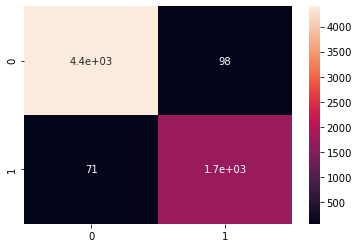

In [23]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.25,stratify=y,random_state=42)

#fitting to the algorithm
rf = RandomForestClassifier(criterion='entropy', n_estimators=400, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

predictions = rf.predict_proba(X_test)
predictions_class = rf.predict(X_test)



if df['fraud'].nunique()> 2:
    rules_score = roc_auc_score(y_test, predictions[:,1], multi_class = 'ovo')
else:
    rules_score = roc_auc_score(y_test, predictions[:,1])

print(rules_score)

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions_class)
print(cf_matrix)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)